for more details see this:
https://realpython.com/pandas-python-explore-dataset/

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
%matplotlib inline
print('finished imports')

finished imports


In [50]:
X=pd.read_csv('data/blood_tests_filled.csv')
X.set_index('ids',inplace=True)
X.head()

Sex   Age    CA     CK  CREA    ALP    GGT    GLU    AST  \
ids                                                                           
A00345_2020-03-25  1.0  82.0  2.09   86.0  1.15   95.0   40.0   78.0   26.0   
A00791_2020-03-19  1.0  51.0  1.97  237.0  0.97   54.0   98.0   98.0   74.0   
A00741_2020-03-04  1.0  58.0  2.11   86.0  1.00   80.0  147.0  106.0   41.0   
A00605_2020-04-15  0.0  82.0  2.27  138.0  0.76  123.5  176.5  106.0  114.0   
A00417_2020-02-24  1.0  79.0  2.07   73.0  1.81   62.0   36.5   96.0   28.0   

                    ALT  ...     MO   EO   BA   NET   LYT  MOT  EOT  BAT  \
ids                      ...                                               
A00345_2020-03-25  21.0  ...   9.50  2.9  0.5  6.40  1.20  0.8  0.3  0.0   
A00791_2020-03-19  84.0  ...   7.45  0.2  0.3  5.30  1.20  0.5  0.0  0.0   
A00741_2020-03-04  36.0  ...   7.30  0.3  0.1  5.45  0.75  0.5  0.0  0.0   
A00605_2020-04-15  63.0  ...   9.50  1.7  0.9  3.60  2.60  0.7  0.1  0.1   
A00417_2020-02-24  38.5  ...  10.00  8.5  0.5  0.40  0.50  0.1  0.1  0.0   

                   Suspect  target  
ids                                 
A00345_2020-03-25      1.0       0  
A00791_2020-03-19      1.0       1  
A00741_2020-03-04      1.0       0  
A00605_2020-04-15      0.5       0  
A00417_2020-02-24      1.0       0  

[5 rows x 35 columns]

for nicer look I'll work with a subframe that consists only of a few columns

In [53]:
X=X[['CA','CK','CREA','ALP','GGT','target']]

In [54]:
pd.set_option("display.precision", 2)
X.describe()

CA       CK     CREA      ALP      GGT   target
count  1736.00  1736.00  1736.00  1736.00  1736.00  1736.00
mean      2.21   124.79     1.15    83.89    58.13     0.47
std       0.46   262.49     0.96    61.38   117.98     0.50
min       1.36    10.00     0.19     1.75     4.00     0.00
25%       2.10    86.00     0.76    61.00    23.00     0.00
50%       2.20    86.00     0.94    71.50    34.00     0.00
75%       2.30    86.00     1.18    83.62    52.25     1.00
max      20.25  7004.33    15.70   914.00  3041.00     1.00

<AxesSubplot:>

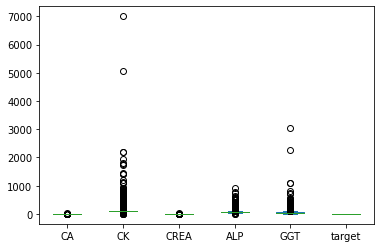

In [55]:
X.plot.box()

<AxesSubplot:>

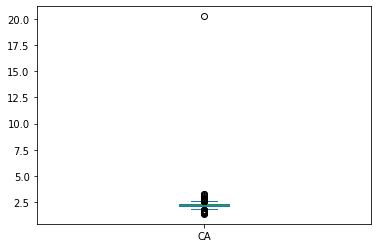

In [56]:
X.CA.plot.box()

Plot correlation matrix corr and its abs(corr) to see whether there are any strngly correlated columns

In [57]:
corr=X.corr()
'''
alternative using seaborn (sns):
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
'''
corr.style.background_gradient(cmap='coolwarm')

In [58]:
corr_abs=corr.abs()
corr_abs.style.background_gradient(cmap='coolwarm')